# Validation of a multidimensionnal metamodel

https://github.com/openturns/openturns/issues/1750

In [1]:
import openturns as ot

In [2]:
model = ot.SymbolicFunction(
    ["X0", "X1", "X2"],
    ["1.0 + 2.0 * X0 - 1.0 * sin(4.0 * X1) + 4.0 * X2", 
     "-2.0 - 3.0 * X0 + 1.0 * X1 - 4.0 * abs(X2)"],
)

In [3]:
distribution = ot.Normal(3)
distribution.setDescription(model.getInputDescription())
trainX = distribution.getSample(50)
trainY = model(trainX)

In [4]:
chaosalgo = ot.FunctionalChaosAlgorithm(trainX, trainY)
chaosalgo.run()
result = chaosalgo.getResult()
metamodel = result.getMetaModel()

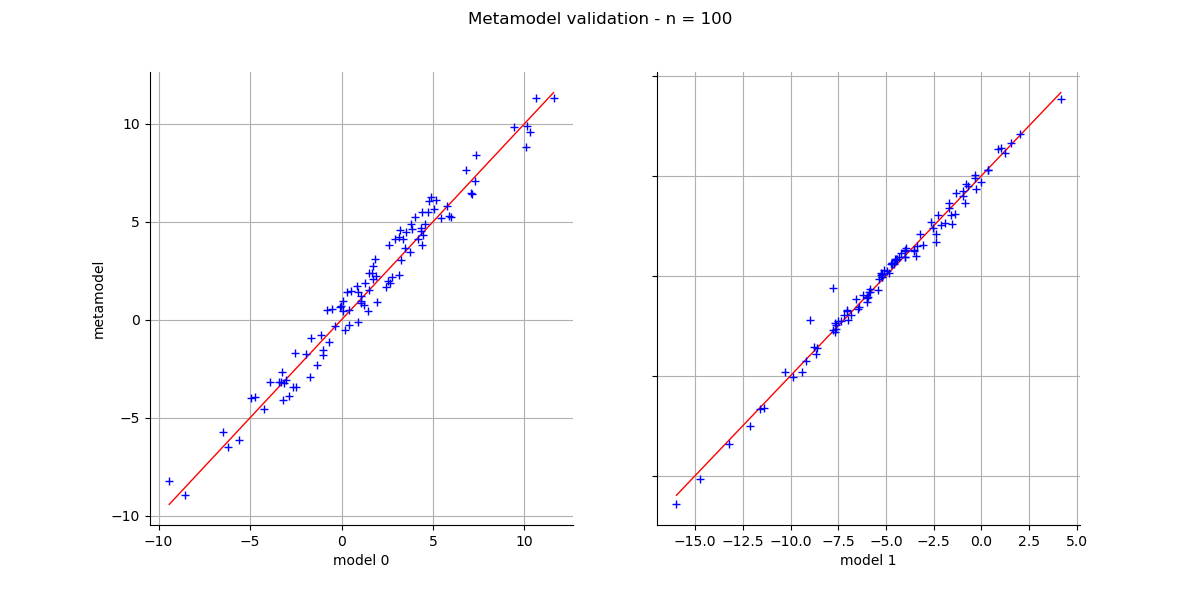

In [5]:
validationX = distribution.getSample(100)
validationY = model(validationX)
val = ot.MetaModelValidation(validationX, validationY, metamodel)
val.drawValidation()